<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/LOG/Ejer1-1_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

# importing linear regression function
import sklearn.linear_model as lm

# function to calculate r-squared, MAE, RMSE
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error

%matplotlib inline

### Lectura de datos


In [2]:
# Load data
df = pd.read_csv('https://drive.google.com/uc?id=1XiPaHHEQRZ5rGwtTalpfDRxpxRS7vgWW',names=['HorasEstudio','Aprueba'])

print(df)

   HorasEstudio  Aprueba
0             2        0
1             3        0
2             4        0
3             5        0
4             6        1
5             7        1
6             8        1
7             9        1
8            10        1


### Regresión Lineal



[0.16666667]
-0.4444444444444444
R Squared :  0.7499999999999999
Mean Absolute Error:  0.20987654320987661
Root Mean Squared Error:  0.24845199749997668


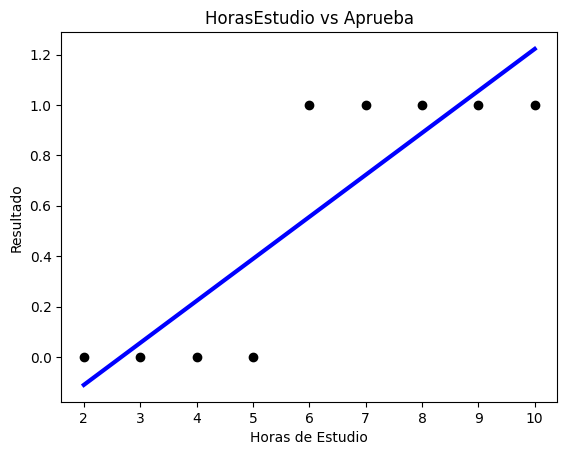

In [3]:
x= df.HorasEstudio.values[:, np.newaxis] # independent variable
y= df.Aprueba                      # dependent variable

# Create linear regression object
lr = lm.LinearRegression()

# Train the model using the training sets
lr.fit(x, y)

# plotting fitted line
plt.scatter(x, y,  color='black')
plt.plot(x, lr.predict(x), color='blue', linewidth=3)
plt.title('HorasEstudio vs Aprueba')
plt.ylabel('Resultado')
plt.xlabel('Horas de Estudio')

# add predict value to the data frame
df['Aprueba_Pred'] = lr.predict(x)
print(lr.coef_)
print(lr.intercept_)

# Using built-in function
print ("R Squared : ", r2_score(df.Aprueba, df.Aprueba_Pred))
print ("Mean Absolute Error: ", mean_absolute_error(df.Aprueba, df.Aprueba_Pred))
print ("Root Mean Squared Error: ", np.sqrt(mean_squared_error(df.Aprueba, df.Aprueba_Pred)))

### Regresión LOgística



Utilizaremos el modelo con la función  logit o sigmoide:

log(p / p(1 - p)) = mx + c

p = 1 / 1 + e^-(mx + c)

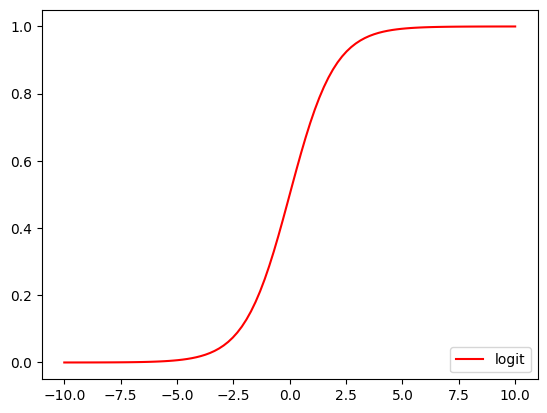

In [ ]:
# plot sigmoid function
x = np.linspace(-10, 10, 100)
y = 1.0 / (1.0 + np.exp(-x))

plt.plot(x, y, 'r-', label='logit')
plt.legend(loc='lower right')

La probabilidad de aprobar es  p = .66 y la de no es  f = 1 - p = .33



coef [[2.67570118]]
intercept [-14.71626805]
[8.56748381e-05 1.24277552e-03 1.77499475e-02 2.07878309e-01
 7.92150806e-01 9.82253135e-01 9.98757444e-01 9.99914340e-01
 9.99994101e-01]
[0 0 0 0 1 1 1 1 1]


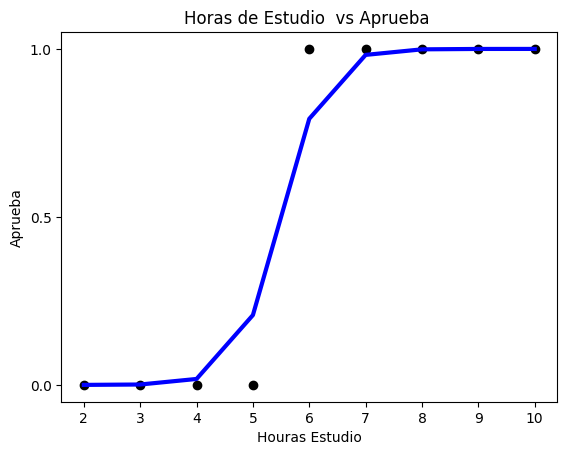

In [6]:
from sklearn.linear_model import LogisticRegression

# manually add intercept
df['intercept'] = 1
#independent_variables = ['HorasEstudio', 'intercept']
independent_variables = ['HorasEstudio']

x = df[independent_variables]       # independent variable
y = df['Aprueba']                      # dependent variable

# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression(C=10)
model = model.fit(x, y)

# check the accuracy on the training set
model.score(x, y)

print("coef",model.coef_)
print("intercept",model.intercept_)

# predict_proba will return array containing proability of y = 0 and y = 1
print( model.predict_proba(x)[:,1])

# predict will give convert the probability(y=1) values > .5 to 1 else 0
print (model.predict(x))

# plotting fitted line
plt.scatter(df.HorasEstudio, y,  color='black')
plt.yticks([0.0, 0.5, 1.0])
plt.plot(df.HorasEstudio, model.predict_proba(x)[:,1], color='blue', linewidth=3)
plt.title('Horas de Estudio  vs Aprueba ')
plt.ylabel('Aprueba')
plt.xlabel('Houras Estudio')
plt.show()

In [7]:
def logistic_function(x):
    return 1/ (1 + np.exp(-x))

In [8]:
logistic_function(0)

np.float64(0.5)

### Compute the Cost Function $J(\theta)$ and Gradient

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [9]:
def compute_cost(theta, x, y):
    m = len(y)
    y_pred = logistic_function(np.dot(x , theta))
    error = (y * np.log(y_pred)) + ((1 - y) * np.log(1 - y_pred))
    cost = -1 / m * sum(error)
    gradient = 1 / m * np.dot(x.transpose(), (y_pred - y))
    return cost[0] , gradient

In [ ]:
def gradiente()

### Cost and Gradient at Initialization

In [24]:
scores = df['HorasEstudio'].values
results = df['Aprueba'].values
rows = scores.shape[0]
cols = 1
X = np.concatenate((np.ones((rows, 1)), scores.reshape(rows, 1)), axis=1) #include intercept
y = results.reshape(rows, 1)

theta_init = np.zeros((cols + 1, 1))
cost, gradient = compute_cost(theta_init, X, y)
print(X[0:3,])
print(y[0:3])
print("Cost at initialization", cost)
print("Gradient at initialization:", gradient)
print(theta_init)

[[1. 2.]
 [1. 3.]
 [1. 4.]]
[[0]
 [0]
 [0]]
Cost at initialization 0.6931471805599453
Gradient at initialization: [[-0.05555556]
 [-1.44444444]]
[[0.]
 [0.]]


In [25]:
theta_init = np.zeros((cols + 1, 1))
cost, gradient = compute_cost(theta_init, X, y)
print(X[0:3,])

print("Cost at initialization", cost)
print("Gradient at initialization:", gradient)
print(theta_init)

[[1. 2.]
 [1. 3.]
 [1. 4.]]
Cost at initialization 0.6931471805599453
Gradient at initialization: [[-0.05555556]
 [-1.44444444]]
[[0.]
 [0.]]


### Gradient Descent

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

In [26]:
import math
def gradient_descent(x, y, theta, alpha, iterations,epsilon):
    costs = []
    prev = math.inf
    for i in range(iterations):
        cost, gradient = compute_cost(theta, x, y)
        costs.append(cost)
        if(abs(costs[i]-prev) < epsilon):
            print("Convergencia Alcanzada !", i ," iteraciones")
            break
        prev = costs[i]
        theta -= (alpha * gradient)
    return theta, costs

In [27]:
theta, costs = gradient_descent(X, y, theta_init, 0.001, 2000000,1e-7)

Convergencia Alcanzada ! 403253  iteraciones


In [28]:
print("Theta after running gradient descent:", theta)
print("Resulting cost:", costs[-1])

Theta after running gradient descent: [[-10.24075172]
 [  1.89255879]]
Resulting cost: 0.08861428522911761


### Plotting the Convergence of $J(\theta)$

Plot $J(\theta)$ against the number of iterations of gradient descent:

<>:3: SyntaxWarning: invalid escape sequence '\T'
<>:3: SyntaxWarning: invalid escape sequence '\T'
/tmp/ipython-input-3802177551.py:3: SyntaxWarning: invalid escape sequence '\T'
  plt.ylabel("$J(\Theta)$")


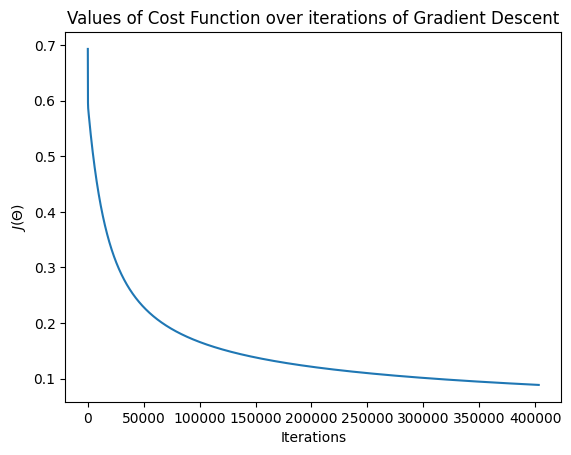

In [29]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of Cost Function over iterations of Gradient Descent");

### Plotting the decision boundary

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1"

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

### Predictions using the optimized $\theta$ values

$h_\theta(x) = x\theta$

In [ ]:
def predict(theta, x):
    results = x.dot(theta)
    return results > 0


In [ ]:
p = predict(theta, X)
print("Training Accuracy:", sum(p==y)[0],"%")

Training Accuracy: 89 %


In [ ]:
test = np.array([50,79])
test = (test - mean_scores)/std_scores
test = np.append(np.ones(1), test)
probability = logistic_function(test.dot(theta))
print("A person who scores 50 and 79 on their DMV written tests have a",
      np.round(probability[0], 2),"probability of passing.")

A person who scores 50 and 79 on their DMV written tests have a 0.71 probability of passing.


In [ ]:
from sklearn import metrics

# generate evaluation metrics
print ("Accuracy :", metrics.accuracy_score(y, model.predict(x)))
print ("AUC :", metrics.roc_auc_score(y, model.predict_proba(x)[:,1]))

print ("Confusion matrix :",metrics.confusion_matrix(y, model.predict(x)))
print ("classification report :", metrics.classification_report(y, model.predict(x)))

Accuracy : 1.0
AUC : 1.0
Confusion matrix : [[4 0]
 [0 5]]
classification report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



### Plot ROC curve

ROC AUC: 1.00


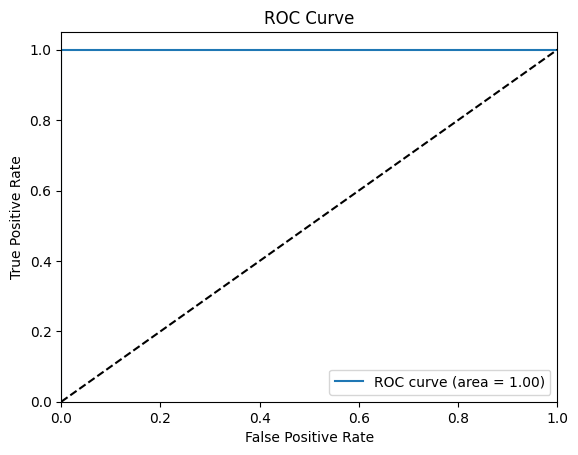

In [ ]:
# Determine the false positive and true positive rates
fpr, tpr, _ = metrics.roc_curve(y, model.predict_proba(x)[:,1])

# Calculate the AUC
roc_auc = metrics.auc(fpr, tpr)
print ('ROC AUC: %0.2f' % roc_auc)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [51]:
def add_ones(X):
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)

In [52]:
#función sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [53]:
#xálculo de la hypòtesis
def calc_h(X, theta):
    z = np.dot(X, theta)
    h = sigmoid(z)
    return h

In [58]:
print(x.shape[1])

1


In [62]:
XX = add_ones(x)
n_cols=x.shape[1]
print(n_cols)
theta = np.zeros((n_cols+1,n_cols))
h = calc_h(XX, theta)

1


In [63]:
print(XX)
print(theta)
print(h)

[[ 1.  2.]
 [ 1.  3.]
 [ 1.  4.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  9.]
 [ 1. 10.]]
[[0.]
 [0.]]
[[0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]]


In [64]:
cost = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
print(cost)

0.6931471805599453


In [65]:
m = y.size
alpha = 0.001


In [37]:
print(theta)

[0. 0.]


## Entrenamiento del modelo

a fin de encontrar los coeficientes del modelo, es decir los elementos del vector $\theta$, debemos proceder a realizar el gradiente descendente de forma iterativa

In [66]:
gradient = np.dot(XX.T, (h - y)) / m
theta -= alpha * gradient

In [38]:
import  math
num_iter = 6000000
epsilon = 10e-6
J_vals = []
prev = math.inf
for i in range(num_iter):
    h = calc_h(XX, theta)
    cost = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    J_vals.append(cost)
    if(abs( J_vals[i]- prev) < epsilon) :
            print("Convergencia Alcanzada !", i ," iteraciones")
            break
    prev = J_vals[i]
    gradient = np.dot(XX.T, (h - y)) / m
    theta -= alpha * gradient
    #if i % 20000 == 0:
    #   print('iteracion ',i,'coste ', cost)

print('Adjusted coefficient: {}'.format(theta))
print("cost: {}".format(J_vals[i]))

ValueError: operands could not be broadcast together with shapes (2,) (2,9) (2,) 

## Variación de la función de pérdida

In [ ]:
plt.plot(range(len(J_vals)), J_vals)